<a href="https://colab.research.google.com/github/YagoPVieira/Simuacao-circuito/blob/main/Graficos_gerados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Carregando dados do arquivo: exported_lm35.txt
Valor de wn para o filtro: 0.00100000050000025
Coeficientes do filtro Butterworth:
Numerador (b): [2.46193251e-06 4.92386501e-06 2.46193251e-06]
Denominador (a): [ 1.         -1.99555712  0.99556697]


<ipython-input-2-74eeacb1a4f6>:62: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


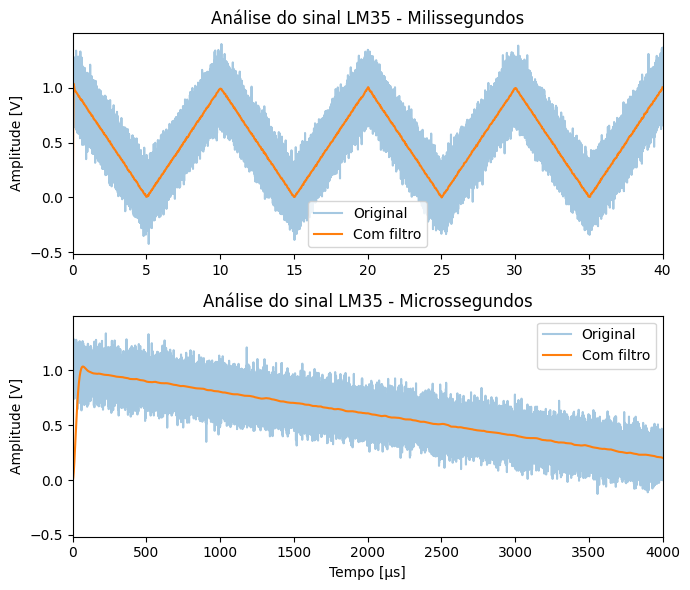

In [2]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import os.path

nome_arquivo = "exported_lm35.txt"

if os.path.isfile(nome_arquivo):
    print(f"Carregando dados do arquivo: {nome_arquivo}")
    eixo_x, dados_brutos = np.loadtxt(nome_arquivo, unpack=True, skiprows=1)
else:
    print(f"Arquivo {nome_arquivo} não encontrado. Criando dados sintéticos para teste.")

    taxa_amostragem = 20e6
    duracao = 0.1
    n_amostras = int(taxa_amostragem * duracao)

    eixo_x = np.linspace(0, duracao, n_amostras)

    periodo = 0.02
    frequencia = 1/periodo

    temp_forma_de_onda = np.abs(signal.sawtooth(2 * np.pi * frequencia * eixo_x, 0.5))

    sinal_lm35 = temp_forma_de_onda * 1.0

    ruido = np.random.normal(0, 0.1, n_amostras)
    dados_brutos = sinal_lm35 + ruido

delta_t = np.diff(eixo_x).mean()
freq_amostragem = 1.0 / delta_t
freq_limite = 10_000.0

wn = freq_limite / (freq_amostragem / 2)
print(f"Valor de wn para o filtro: {wn}")

coeficientes_b, coeficientes_a = signal.butter(2, wn, btype='low')

print(f"Coeficientes do filtro Butterworth:")
print(f"Numerador (b): {coeficientes_b}")
print(f"Denominador (a): {coeficientes_a}")

dados_processados = signal.lfilter(coeficientes_b, coeficientes_a, dados_brutos)

figura, graficos = plt.subplots(2, 1, figsize=(7, 6), sharex=False)

graficos[0].plot(eixo_x * 1e3, dados_brutos, label="Original", alpha=.4)
graficos[0].plot(eixo_x * 1e3, dados_processados, label="Com filtro", linewidth=1.5)
graficos[0].set_xlim(0, 40)
graficos[0].set_ylabel("Amplitude [V]")
graficos[0].legend()
graficos[0].set_title("Análise do sinal LM35 - Milissegundos")

graficos[1].plot(eixo_x * 1e6, dados_brutos, label="Original", alpha=.4)
graficos[1].plot(eixo_x * 1e6, dados_processados, label="Com filtro", linewidth=1.5)
graficos[1].set_xlim(0, 4000)
graficos[1].set_xlabel("Tempo [µs]")
graficos[1].set_ylabel("Amplitude [V]")
graficos[1].legend()
graficos[1].set_title("Análise do sinal LM35 - Microssegundos")

plt.tight_layout()
plt.show()

if not os.path.isfile(nome_arquivo):
    print(f"Salvando dados sintéticos em {nome_arquivo} para uso futuro")
    with open(nome_arquivo, 'w') as f:
        f.write("time V(Vfilt)\n")
        for t, v in zip(eixo_x, dados_brutos):
            f.write(f"{t:.16e} {v:.16e}\n")